In [9]:
# check lightgbm version
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMRegressor
from matplotlib import pyplot
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn import preprocessing

# evaluate lightgbm ensemble for regression
from numpy import mean
from numpy import std
import pandas as pd


In [10]:
def splitBySession():
  
  # importing the merged dataset from spotify
  spotifyData = pd.read_csv("spotify_merged_dataset.csv")
  # spotifyData.info()
  gby = spotifyData.groupby('session_id')
  # print(gby.agg(list))
  print(gby.agg(pd.Series.tolist).head())
splitBySession()

                                                                               Unnamed: 0  ...                                           liveness
session_id                                                                                 ...                                                   
1_00001238-3f7a-4fd2-b52e-af4237a41ed9  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  ...  [0.1122471019625663, -999.0, 0.122876264154911...
1_00001396-6ac0-4583-a3fd-c286579eda66   [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]  ...  [0.108414240181446, 0.1201553791761398, -999.0...
1_00010670-8e11-4d16-9a05-9bebd37ba758  [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 4...  ...  [0.0861334353685379, 0.2020473927259445, 0.189...
1_000157d2-9424-4240-88ae-12b9d2835e52  [52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 6...  ...  [-999.0, -999.0, -999.0, 0.0489461608231067, -...
1_00015a7d-b075-4661-85c5-e3f424344dda  [66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 7...  ...  [-999.0, -999.0, -999.0, -99

In [11]:
def importDataSet():
  
  # importing the merged dataset from spotify
  spotifyData = pd.read_csv("spotify_merged_dataset.csv")
  tempDf = spotifyData

  # converting boolean output column to int 
  tempDf["skip_2"] = tempDf["skip_2"]*1
  
  y = tempDf["skip_2"].to_numpy()
  # Dropping output column and serial number column
  tempDf = tempDf.drop(tempDf.columns[[0, 1,3,4]], axis=1)
  

  # tempDf[tempDf < 0] = 0
  x = tempDf.to_numpy()
  print(y)
  return tempDf,spotifyData,x,y

In [12]:
tempDf,spotifyData,X,Y = importDataSet()
tempDf.describe()


[1 1 1 ... 0 0 1]


,session_length,acousticness,danceability,loudness,speechiness,liveness
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,17.616240,-510.979002,-510.765254,-514.533860,-511.019604,-510.995005
std,3.403381,499.482549,499.701298,495.849398,499.440971,499.466150
min,10.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,15.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
50%,20.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
75%,20.000000,0.113909,0.675128,-6.477000,0.081916,0.124292
max,20.000000,0.995501,0.984394,0.496000,0.965393,0.997182


[1 1 1 ... 0 0 1]
[10]	training's xentropy: 0.683855	valid_0's xentropy: 0.689318
[10]	training's auc: 0.585218	valid_0's auc: 0.54718
Accuracy on test data:  0.5399393939393939


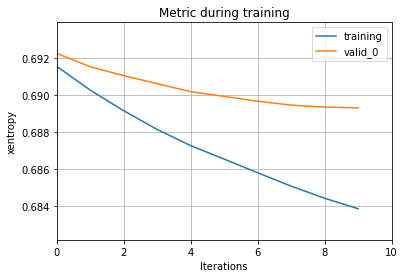

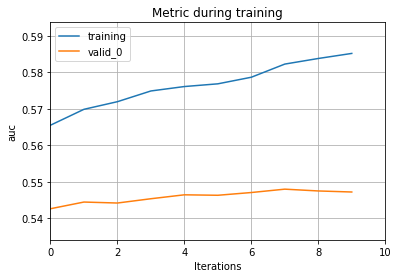

In [13]:
# Test train Split
tempDf,spotifyData,X,Y = importDataSet()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

modelAuc = LGBMClassifier(metric=['cross_entropy'],n_estimators= 10)
modelEntr = LGBMClassifier(metric=['auc'],n_estimators= 10)
# model.fit(X_train, y_train)
modelAuc.fit(X_train, y_train, eval_set=[(X_test, y_test), (X_train, y_train)], verbose=10)
modelEntr.fit(X_train, y_train, eval_set=[(X_test, y_test), (X_train, y_train)], verbose=10)
# lgb.plot_metric(model, metric='auc')
lgb.plot_metric(modelAuc )
lgb.plot_metric(modelEntr)
# Predicting the Target variable
# print()
# pred = modelEntr.predict(X_test)
# print(pred)
accuracy = modelEntr.score(X_test, y_test)
print("Accuracy on test data: ",accuracy)
# lgb.plot_metric(model)